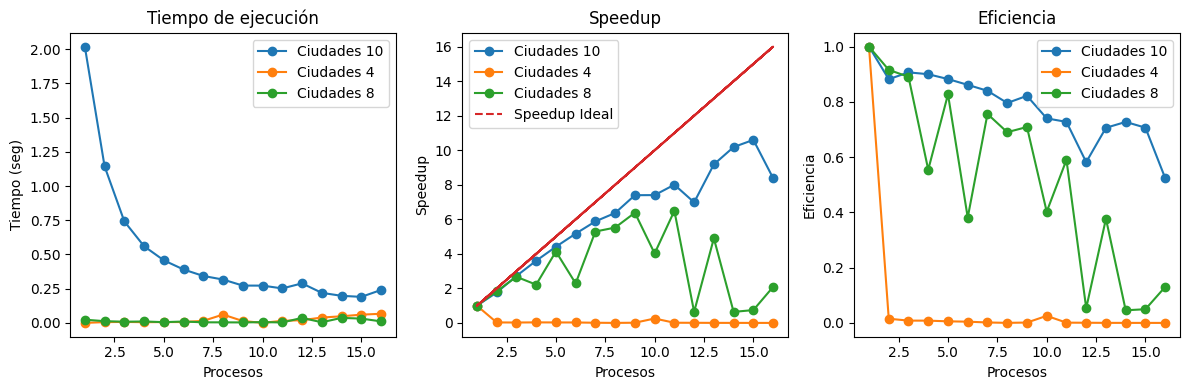

In [4]:
import matplotlib.pyplot as plt
import csv

path = 'performance.csv'

cities = []
processes = []
times_comp = []
# times_comm = []
# times_total = []
# errors = []

with open(path) as file:
  reader = csv.reader(file)
  next(reader)
  for row in reader:
    cities.append(row[0])
    processes.append(int(row[1]))
    times_comp.append(float(row[2]))
    # times_comm.append(float(row[3]))
    # times_total.append(float(row[4]))
    # errors.append(float(row[5]))

unique_cities = sorted(set(cities))

plt.figure(figsize=(12, 4))

# Tiempo de ejecución
plt.subplot(1, 3, 1)
for size in unique_cities:
  size_data = [i for i, s in zip(times_comp, cities) if s == size]
  size_processes = [i for i, s in zip(processes, cities) if s == size]

  plt.plot(size_processes, size_data, marker="o", label=f"Ciudades {size}")

plt.title("Tiempo de ejecución")
plt.xlabel("Procesos")
plt.ylabel("Tiempo (seg)")
plt.legend()

# Speedup
plt.subplot(1, 3, 2)
for size in unique_cities:
  size_data = [i for i, s in zip(times_comp, cities) if s == size]
  size_processes = [i for i, s in zip(processes, cities) if s == size]
  t1 = size_data[0]
  speedups = [t1 / t for t in size_data]

  plt.plot(size_processes, speedups, marker="o", label=f"Ciudades {size}")

plt.plot(processes, [p for p in processes], linestyle="--", label="Speedup Ideal")
plt.title("Speedup")
plt.xlabel("Procesos")
plt.ylabel("Speedup")
plt.legend()

# Eficiencia
plt.subplot(1, 3, 3)
for size in unique_cities:
  size_data = [i for i, s in zip(times_comp, cities) if s == size]
  size_processes = [i for i, s in zip(processes, cities) if s == size]
  t1 = size_data[0]
  speedups = [t1 / t for t in size_data]
  efficiences = [s/p for s, p in zip(speedups, size_processes)]

  plt.plot(size_processes, efficiences, marker="o", label=f"Ciudades {size}")

plt.title("Eficiencia")
plt.xlabel("Procesos")
plt.ylabel("Eficiencia")
plt.legend()

plt.tight_layout()
plt.show()